In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Data Preprocessing

In [3]:
df = pd.read_csv("./data/Telco_Customer_Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data cleaning

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14120\1479199042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

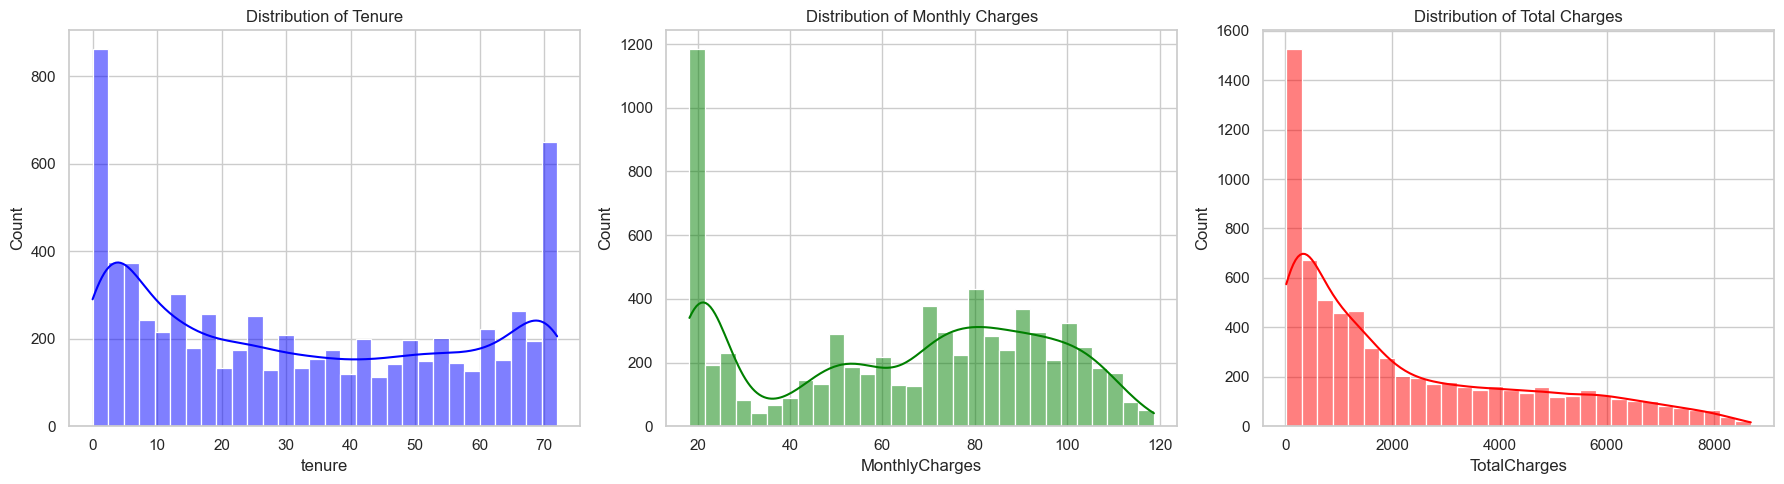

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], kde=True, color='blue', bins=30)
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], kde=True, color='green', bins=30)
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], kde=True, color='red', bins=30)
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()


In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '7590-VHVEG'

C:\Users\DELL\AppData\Local\Temp\ipykernel_14120\2246415480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


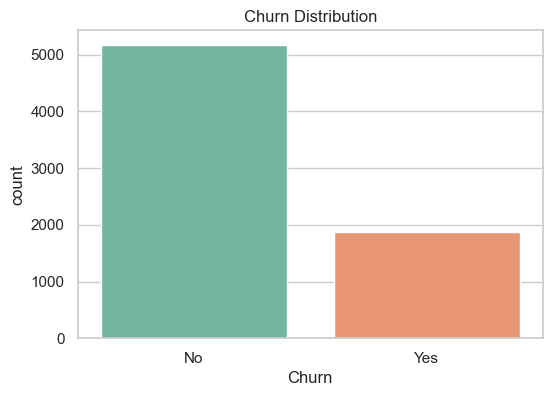

In [14]:
# Plot the distribution of churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.show()

# Categorical Feature Analysis of Churn

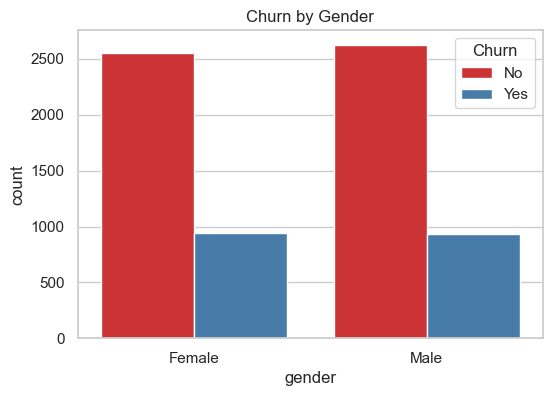

In [15]:
# Churn by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Gender')
plt.show()

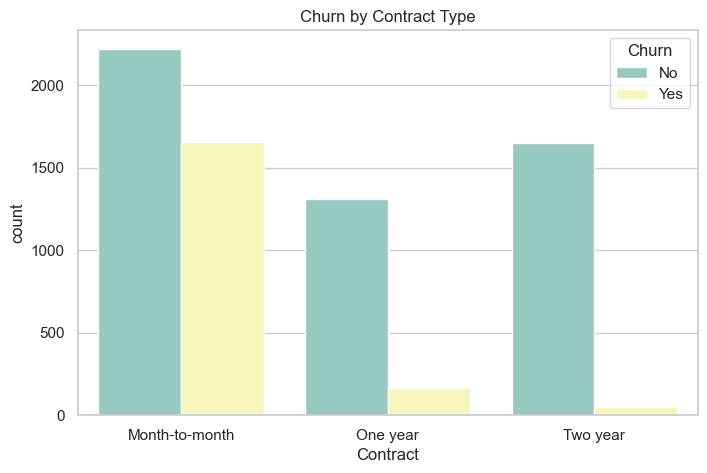

In [16]:
# Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Contract Type')
plt.show()


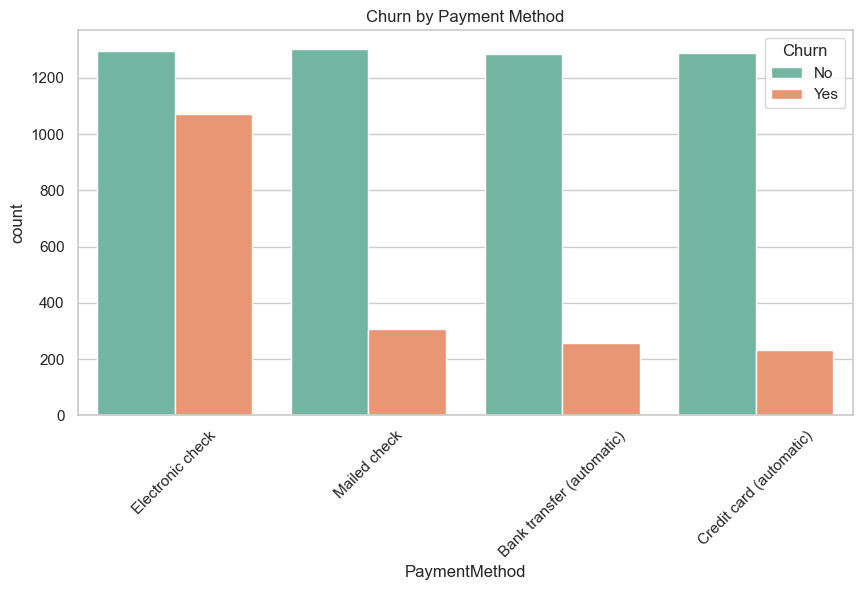

In [17]:
# Churn by Payment Method
plt.figure(figsize=(10, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()


Feature Relationship and Churn

C:\Users\DELL\AppData\Local\Temp\ipykernel_14120\3746013284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')


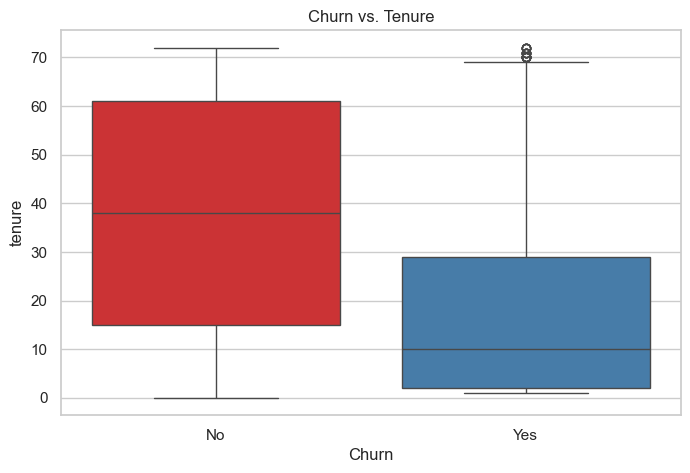

In [18]:
# Churn vs. Tenure
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set1')
plt.title('Churn vs. Tenure')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14120\1167154968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set1')


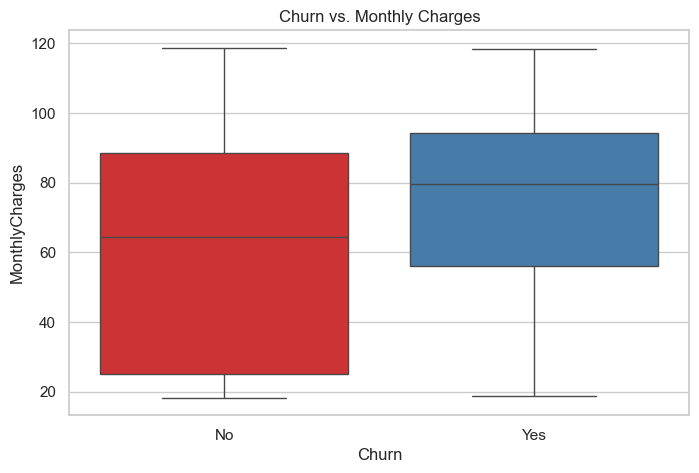

In [19]:
# Churn vs. Monthly Charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set1')
plt.title('Churn vs. Monthly Charges')
plt.show()

Feature Engineering

1. Engagement Score

In [20]:
alpha, beta, gamma = 0.4, 0.3, 0.3 
df['EngagementScore'] = alpha * df['MonthlyCharges'] + beta * df['tenure'] + gamma * df['TechSupport'].map({'Yes': 1, 'No': 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,EngagementScore
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,12.24
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,32.98
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,22.14
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,30.72
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,28.88


2. Customer Interaction Frequency

In [21]:
df['CustomerInteractionFrequency'] = df['TechSupport'].map({'Yes': 1, 'No': 0}) 

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,EngagementScore,CustomerInteractionFrequency
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,12.24,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,32.98,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,22.14,0.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,30.72,1.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,28.88,0.0


3. Long term contract

In [23]:
# Convert 'Contract' to binary values (1 for month-to-month, 0 for longer contracts)
df['LongTermContractStability'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 1})

# View the new column
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,EngagementScore,CustomerInteractionFrequency,LongTermContractStability
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,12.24,0.0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,32.98,0.0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,22.14,0.0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,30.72,1.0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,28.88,0.0,0


In [24]:
# Calculate usage anomaly (this can be based on 'MonthlyCharges' or another usage metric)
usage_mean = df['MonthlyCharges'].mean()
usage_std = df['MonthlyCharges'].std()

# Set a threshold for anomaly detection
threshold = 3
df['UsageAnomaly'] = ((df['MonthlyCharges'] - usage_mean).abs() > threshold * usage_std).astype(int)

# View the new column
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,EngagementScore,CustomerInteractionFrequency,LongTermContractStability,UsageAnomaly
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,12.24,0.0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,32.98,0.0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,22.14,0.0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,30.72,1.0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,28.88,0.0,0,0


C:\Users\DELL\AppData\Local\Temp\ipykernel_14120\1733042808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='EngagementScore', data=df, palette='Set2')


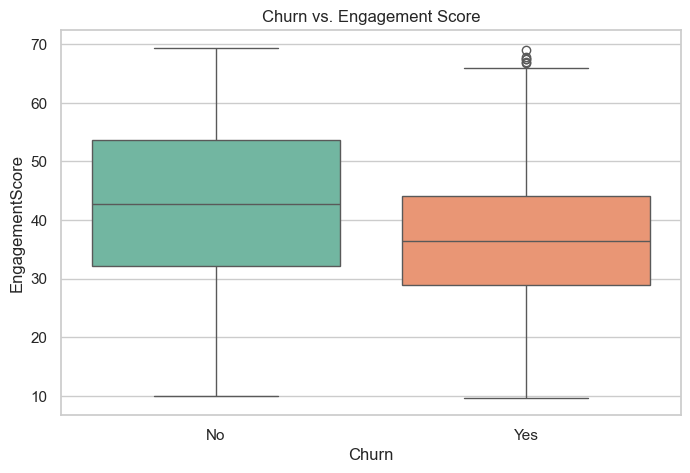

In [25]:
# Churn vs. Engagement Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='EngagementScore', data=df, palette='Set2')
plt.title('Churn vs. Engagement Score')
plt.show()

Preprocessing & Train-test split

In [26]:
# One-hot encoding categorical variables
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'InternetService', 'PaymentMethod'], drop_first=True)

df.head()

,customerID,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,LongTermContractStability,UsageAnomaly,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,No,No phone service,No,Yes,No,No,No,...,0,0,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,34,Yes,No,Yes,No,Yes,No,No,...,1,0,True,False,False,False,False,False,False,True
2,3668-QPYBK,0,2,Yes,No,Yes,Yes,No,No,No,...,0,0,True,False,False,False,False,False,False,True
3,7795-CFOCW,0,45,No,No phone service,Yes,No,Yes,Yes,No,...,1,0,True,False,False,False,False,False,False,False
4,9237-HQITU,0,2,Yes,No,No,No,No,No,No,...,0,0,False,False,False,True,False,False,True,False


In [27]:
# Apply Min-Max scaling to relevant features
scaler = MinMaxScaler()
df[['MonthlyCharges', 'tenure', 'EngagementScore', 'CustomerInteractionFrequency', 
    'LongTermContractStability', 'UsageAnomaly']] = scaler.fit_transform(
    df[['MonthlyCharges', 'tenure', 'EngagementScore', 'CustomerInteractionFrequency', 
        'LongTermContractStability', 'UsageAnomaly']])

df.head()


,customerID,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,LongTermContractStability,UsageAnomaly,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0.013889,No,No phone service,No,Yes,No,No,No,...,0.0,0.0,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0.472222,Yes,No,Yes,No,Yes,No,No,...,1.0,0.0,True,False,False,False,False,False,False,True
2,3668-QPYBK,0,0.027778,Yes,No,Yes,Yes,No,No,No,...,0.0,0.0,True,False,False,False,False,False,False,True
3,7795-CFOCW,0,0.625000,No,No phone service,Yes,No,Yes,Yes,No,...,1.0,0.0,True,False,False,False,False,False,False,False
4,9237-HQITU,0,0.027778,Yes,No,No,No,No,No,No,...,0.0,0.0,False,False,False,True,False,False,True,False


In [32]:
X = df[['MonthlyCharges', 'tenure', 'EngagementScore', 'CustomerInteractionFrequency', 'LongTermContractStability', 'UsageAnomaly']]
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (5634, 6)
Test set shape: (1409, 6)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1036
           1       0.56      0.47      0.51       373

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.76      1409



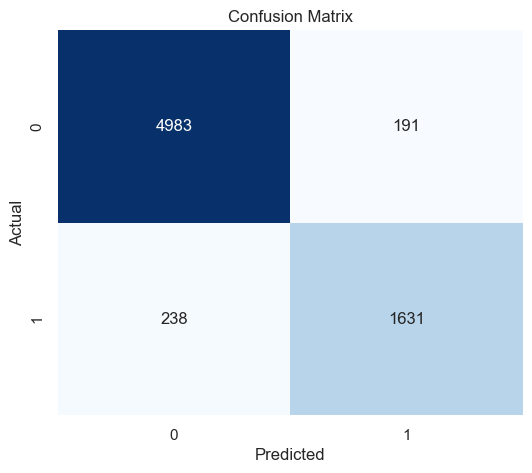

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5174
           1       0.90      0.87      0.88      1869

    accuracy                           0.94      7043
   macro avg       0.92      0.92      0.92      7043
weighted avg       0.94      0.94      0.94      7043



In [40]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions (using Random Forest or another model you've trained)
y_pred = model.predict(X)

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y, y_pred))

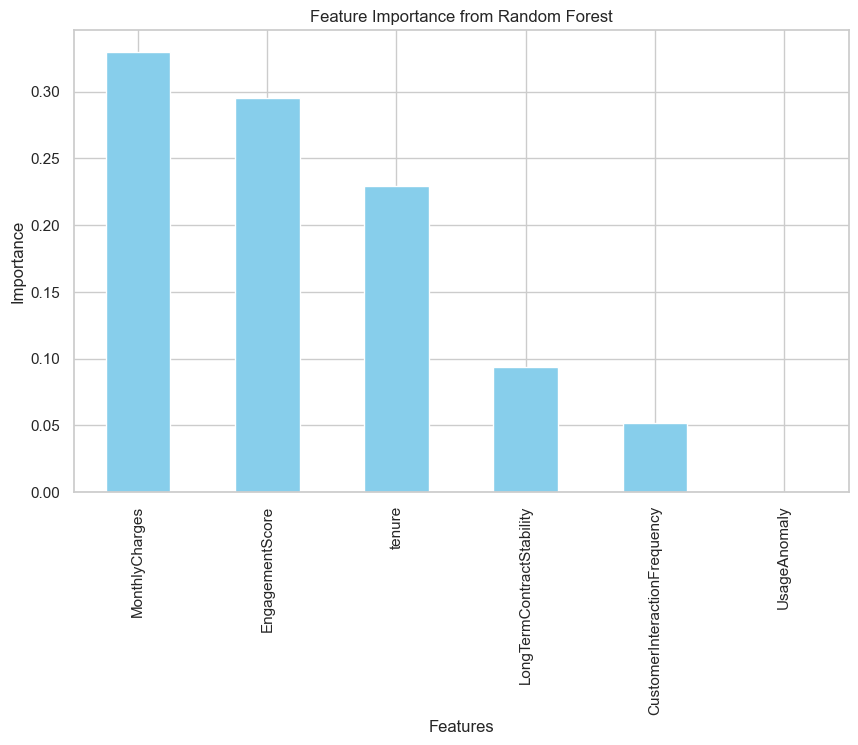

In [37]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

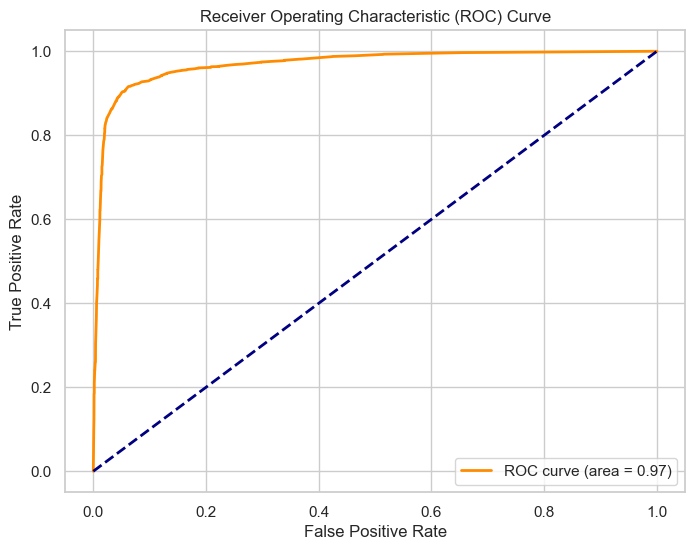

In [41]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()